<a href="https://colab.research.google.com/github/saloni1901/machine_learning_basics/blob/main/Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install Pyforest
import pyforest#include pandas library
import warnings
warnings.filterwarnings("ignore")

In [24]:
data=pd.read_csv('50_Startups.csv')
data.head()

<IPython.core.display.Javascript object>

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
data.shape

(50, 5)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [27]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [28]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [29]:
#p_value to check statiscal significance
#five method for building model(1.all feature,2.backward_selection,3.forward,4.bidirctional,5.score camparion)

In [33]:
dummy=pd.get_dummies(data['State'],drop_first=True)#pd.concat[data,dummy],axis=1 #data.merge(dummy,left_index=True,right_index=True)
data=pd.concat([data,dummy],axis=1)
data.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [31]:
#no need to scale in multipe linear regression it compasenate by coeff

In [34]:
data.drop(['State'],axis=1,inplace=True)

In [35]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


<IPython.core.display.Javascript object>

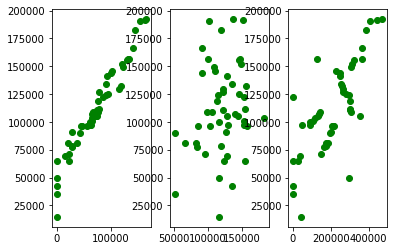

In [68]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3)
ax1.scatter(data['R&D Spend'],data['Profit'],c='g')
ax2.scatter(data['Administration'],data['Profit'],c='g')
ax3.scatter(data['Marketing Spend'],data['Profit'],c='g')


In [47]:
x=data.drop(['Profit'],axis=1).values
y=data.Profit.values

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [49]:
from sklearn.linear_model import LinearRegression
l1=LinearRegression()
l1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
p1=l1.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((p1.reshape(len(p1),1),y_test.reshape(len(y_test),1)),1))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[[ 69125.16  81229.06]
 [111113.32 108733.99]
 [ 45292.79  64926.08]
 [ 62094.07  65200.33]
 [134908.   144259.4 ]
 [156277.68 156122.51]
 [147752.1  129917.04]
 [154832.56 152211.77]
 [ 97175.81  97483.56]
 [ 97358.91  96778.92]
 [118175.89 105008.31]
 [166264.39 156991.12]
 [ 87401.31  89949.14]
 [ 81970.61  81005.76]
 [112305.75 108552.04]
 [120694.2  111313.02]
 [113244.46 122776.86]]


In [51]:
l1.intercept_

43219.63969714267

In [52]:
l1.coef_

array([ 7.97e-01, -6.80e-04,  4.62e-02,  7.71e+01,  1.27e+03])

In [53]:
l1.score(X_train,y_train)

0.9580285564483583

In [55]:
from sklearn.linear_model import Ridge,Lasso
l2=Ridge(alpha=1)
l2.fit(X_train,y_train)
print(l2.score(X_train,y_train),l2.intercept_,l2.coef_)


0.9580247354714343 43383.42979351437 [ 7.97e-01 -1.38e-03  4.61e-02 -1.29e+01  1.03e+03]


In [56]:
l3=Lasso(alpha=1)
l3.fit(X_train,y_train)
print(l3.score(X_train,y_train),l3.intercept_,l3.coef_)

0.9580285467883652 43228.04701725568 [ 7.97e-01 -7.11e-04  4.62e-02  6.88e+01  1.26e+03]
